In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pickle

%matplotlib inline

from scipy import sparse
from sklearn.metrics.pairwise import pairwise_distances

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# Import Dataframe

In [2]:
nba_stats19 = pd.read_csv('../data/nba_stats19.csv', index_col = [0])
nba_stats19.drop(columns = ['DREB_y', 'T_DREB%_y', 'T_STL%_y', 'T_BLK%_y', 'Age_y','FT%_y'], inplace = True)
nba_stats19.rename(columns = {'Age_x': 'Age', 'FT%_x': 'FT%', 'DREB_x': 'DREB', 'T_DREB%_x' : 'T_DREB%',
                             'T_STL%_x': 'T_STL%', 'T_BLK%_x': 'T_BLK%'}, inplace = True)

# Label Stats

In [3]:
shooting_stats = ['FGA_2P%', 'FGA_3P%', '2PT%', '2PT_MR%', '3P%',
           'FBPTS%', 'OFFTOV%', 'PAINTPTS%', 'AST_2FGM%', 'UAST_2FGM%',
           'AST_3FGM%', 'UAST_3FGM%', 'FGM_AST%', 'FGM_UAST%'
           ]

# KMEANS

In [4]:
X = nba_stats19[shooting_stats]
y = nba_stats19['Player']

#scale data
sc = StandardScaler()
X_sc = sc.fit_transform(X)

#dimensionality reduction
pca = PCA(n_components = 5)
pca.fit(X_sc)
X_pca = pca.transform(X_sc)
print("Cumulative Explained Variance:", pca.explained_variance_ratio_.sum())

Cumulative Explained Variance: 0.8344925802163616


In [5]:
#creating clusters
shooting = KMeans(n_clusters = 3,random_state= 248)
shooting.fit(X_pca)
y_kmeans = shooting.predict(X_pca)
nba_stats19['shoot_kmean'] = shooting.labels_
shoot_sil = silhouette_score(X_sc, shooting.labels_)
silhouette_score(X_sc, shooting.labels_)

0.24302886699437912

In [6]:
shoot_cluster0 = nba_stats19[nba_stats19['shoot_kmean'] == 0]
shoot_cluster1 = nba_stats19[nba_stats19['shoot_kmean'] == 1]
shoot_cluster2 = nba_stats19[nba_stats19['shoot_kmean'] == 2]

# Boxplots

Text(0.5, 1.0, 'Percent of 3PT FG Made Unassisted')

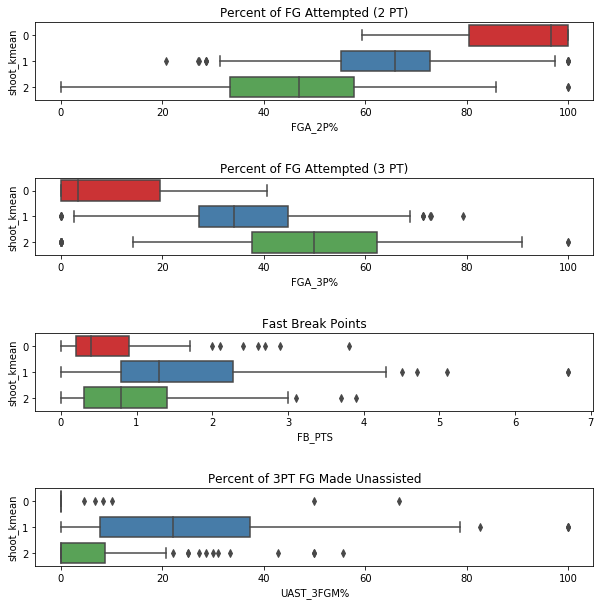

In [7]:
fig, axes = plt.subplots(4, 1, figsize = (10, 10))
plt.subplots_adjust(hspace = 1)
sns.boxplot(x = 'FGA_2P%', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[0]).set_title('Percent of FG Attempted (2 PT)')
sns.boxplot(x = 'FGA_3P%', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[1]).set_title('Percent of FG Attempted (3 PT)')
sns.boxplot(x = 'FB_PTS', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[2]).set_title('Fast Break Points')
sns.boxplot(x = 'UAST_3FGM%', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[3]).set_title('Percent of 3PT FG Made Unassisted')

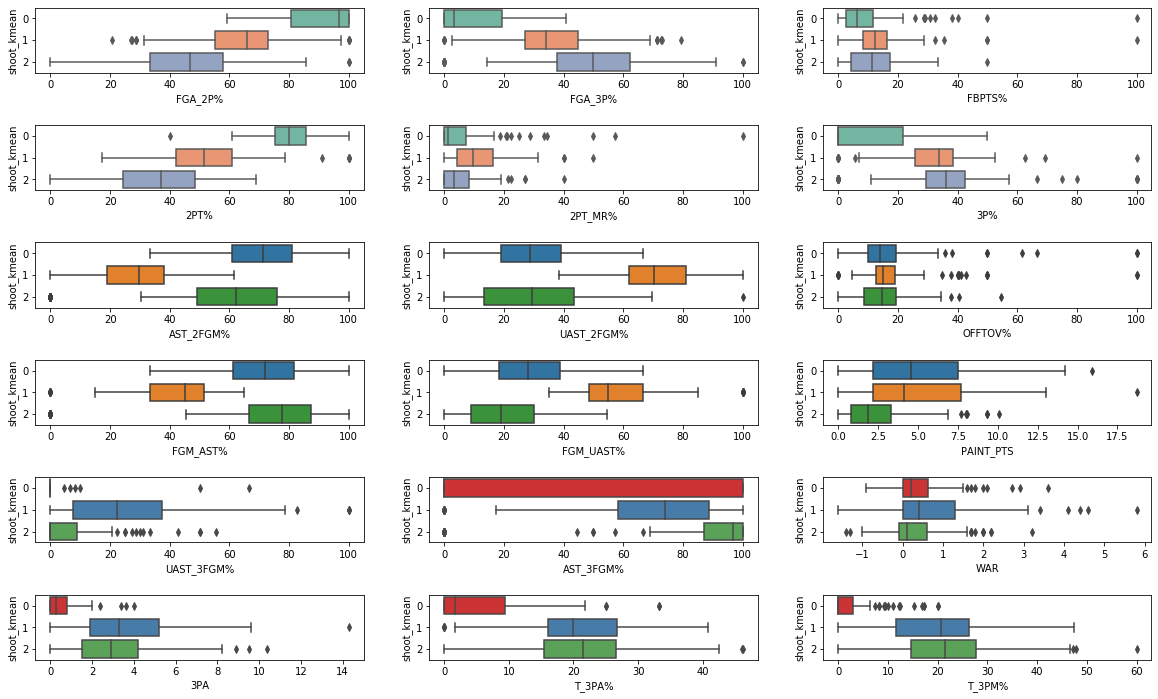

In [8]:
fig, axes = plt.subplots(6, 3, figsize = (20, 12))
plt.subplots_adjust(hspace = 0.8)
sns.boxplot(x = 'FGA_2P%', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[0,0])
sns.boxplot(x = 'FGA_3P%', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[0,1])
sns.boxplot(x = 'FBPTS%', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[0,2])
#---------------------- line 2
sns.boxplot(x = '2PT%', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[1,0])
sns.boxplot(x = '2PT_MR%', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[1,1])
sns.boxplot(x = '3P%', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set2", ax = axes[1,2])
#---------------------- LINE 3
sns.boxplot(x = 'AST_2FGM%', y = 'shoot_kmean', data = nba_stats19, orient="h", ax = axes[2,0])
sns.boxplot(x = 'UAST_2FGM%', y = 'shoot_kmean', data = nba_stats19, orient="h", ax = axes[2,1])
sns.boxplot(x = 'OFFTOV%', y = 'shoot_kmean', data = nba_stats19, orient="h", ax = axes[2,2])
#---------------------- LINE 4
sns.boxplot(x = 'FGM_AST%', y = 'shoot_kmean', data = nba_stats19, orient="h", ax = axes[3,0])
sns.boxplot(x = 'FGM_UAST%', y = 'shoot_kmean', data = nba_stats19, orient="h", ax = axes[3,1])
sns.boxplot(x = 'PAINT_PTS', y = 'shoot_kmean', data = nba_stats19, orient="h", ax = axes[3,2])
#---------------------- LINE 5
sns.boxplot(x = 'UAST_3FGM%', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[4,0])
sns.boxplot(x = 'AST_3FGM%', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[4,1])
sns.boxplot(x = 'WAR', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[4,2])
#---------------------- LINE 6
sns.boxplot(x = '3PA', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[5,0])
sns.boxplot(x = 'T_3PA%', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[5,1])
sns.boxplot(x = 'T_3PM%', y = 'shoot_kmean', data = nba_stats19, orient="h", palette="Set1", ax = axes[5,2])

**Cluster 0 - The Dependent Shooter**: For some reasons these players need to have assistance in most, if not all of their shot attempts. It is very unlikley that they will make any 3P shots. Most of their shot attempts will be in the 2 PT range. They are more confident in shooting 2PTS unassisted compared to shooting 3 PTs unassisted. 

- honorable mentions: LaMarcus Aldridge, Ivica Zubac, DeAndre Jordan

**Cluster 1 - The Brave Shooter**: These are the most dependable shooters. About half of their shots are assisted while the other half are unassisted. In addition, their FG shots are split almost evenly between 3 PT and 2 PT. This group of players will be more likely to take and make Mid Range shots which ahs been proven to be more effective for team plays than 2 PT shots. 

- honorable mentions: Zach LaVine, Goran Dragic, Dennis Schroder

**Cluster 2 - Ol'Reliable**: These players are the most likley to take any 3 PT shot the teams need. However, expect that most of their 3PT shots with assisance. Most of them will score outside the paint, away from the basket. Though these players are confident in the 3 PT attempts, they are most reliable in their 2 PT shots.

- honorable mentions: Karl-Anthony-Towns, Tim Hardaway Jr., Mo Bamba

Player | Shoot Cluster | Salary ($) | Current Team | Named Pos
----- | -------| ------ | ------| -------|
Nikola Vucevic | 0 | 28,00,000 | ORL | C 
Andre Drummond | 0 |  27,093,019 | DET | C
Anthony Davis | 0 | 27,093,019 | LAL | PF
Bruno Fernando | 0 | 1,400,000 | ATL | C
Javonte Green | 0 | 898,310	| BOS | SF 
Nicolas Claxton | 0 | 898,310 | BRK | PF
Stephen Curry | 1 | 40,231,758 | GSW | PG
Chris Paul | 1 | 38,506,482 | OKC |  PG
Russell Westbrook | 1 | 38,178,000 | HOU | PG
Kevin Porter Jr. | 1 | 1,173,310 | CLE | SF 
George Hill | 1 | 1,000,000 | MIL | PG 
Shaquille Harrison | 1 | 898,310 | CHI | SF
Paul George | 2 | 33,005,556 | LAC | SF 
Gordan Hayward | 2 | 37,700,690 | BOS | SF 
Paul Millsap | 2 | 30,500,000 | DEN | SF
Svi Mykhailiuk | 2 | 1,416,852 | DET | SF 
Terence Davis | 2 | 893,310 | TOR | SG
Matt Thomas | 2 | 893,310 | TOR | SF